<a href="https://colab.research.google.com/github/alok13/Machine-Learning/blob/master/Image%20Classification/Food%20classification/Food_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

**Download the Data**

In [0]:
import os

def download_extract():
  if "food-101" in os.listdir():
    print("Data already exist")
  else:
    print("Downloading the data")
    !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
    print("Dataset downloaded!")
    print("Extracting data..")
    !tar xzvf food-101.tar.gz
    print("Extraction done!")  

In [4]:
download_extract()

--2019-11-26 17:02:05--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2019-11-26 17:02:06--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  10.7MB/s    in 7m 48s  

2019-11-26 17:09:56 (10.2 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]

Dataset downloaded!
Extracting data..
food-101/
food-101/images/
food-101/images/beignets/
food-101/images/beignets/2885220.jpg
food-101/images/beignets/1814040.jpg
food-1

In [5]:
path=Path('food-101/images')
#print(os.listdir(path))
#print(os.listdir(path/'meta'))
print(os.listdir(path))


['cheesecake', 'greek_salad', 'club_sandwich', 'hot_and_sour_soup', 'risotto', 'chicken_curry', 'chocolate_cake', 'red_velvet_cake', 'pizza', 'cup_cakes', 'lobster_bisque', 'chocolate_mousse', 'pho', 'donuts', 'ceviche', 'chicken_wings', 'deviled_eggs', 'dumplings', 'takoyaki', 'falafel', 'fried_rice', 'steak', 'pork_chop', 'ice_cream', 'beef_carpaccio', 'clam_chowder', 'crab_cakes', 'pulled_pork_sandwich', 'macaroni_and_cheese', 'beef_tartare', 'tuna_tartare', 'baby_back_ribs', 'pad_thai', 'pancakes', 'hummus', 'nachos', 'mussels', 'prime_rib', 'foie_gras', 'chicken_quesadilla', 'waffles', 'carrot_cake', 'sushi', 'strawberry_shortcake', 'eggs_benedict', 'beet_salad', 'seaweed_salad', 'onion_rings', 'french_onion_soup', 'fish_and_chips', 'spring_rolls', 'omelette', 'bruschetta', 'macarons', 'creme_brulee', 'breakfast_burrito', 'panna_cotta', 'guacamole', 'hot_dog', 'baklava', 'beignets', 'sashimi', 'caprese_salad', 'shrimp_and_grits', 'oysters', 'gnocchi', 'poutine', 'scallops', 'gyoza

In [0]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

In [0]:
# classes=os.listdir(path)
# base_dir='food-101'
# for cl in classes:
#   img_path = os.path.join(base_dir, cl)
#   images = glob.glob(img_path + '/*')
#   print("{}: {} Images".format(cl, len(images)))
#   num_train = int(round(len(images)*0.8))
#   train, val = images[:num_train], images[num_train:]

#   for t in train:
#     if not os.path.exists(os.path.join(base_dir, 'train', cl)):
#       os.makedirs(os.path.join(base_dir, 'train', cl))
#     shutil.move(t, os.path.join(base_dir, 'train', cl))

#   for v in val:
#     if not os.path.exists(os.path.join(base_dir, 'valid', cl)):
#       os.makedirs(os.path.join(base_dir, 'valid', cl))
#     shutil.move(v, os.path.join(base_dir, 'valid', cl)) 

In [0]:
# Helper method to split dataset into train and test folders
from shutil import copy
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [8]:
# Prepare train dataset by copying images from food-101/images to food-101/train using the file train.txt
print("Creating train data...")
prepare_data('food-101/meta/train.txt', 'food-101/images', 'food-101/train')



Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying im

In [9]:
# Prepare test data by copying images from food-101/images to food-101/test using the file test.txt
print("Creating test data...")
prepare_data('food-101/meta/test.txt', 'food-101/images', 'food-101/test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In [0]:
os.rename('food-101/test', 'food-101/valid')

In [0]:
data_dir = "food-101/images/"
foods_sorted = sorted(os.listdir(data_dir))

In [0]:
# Helper function to select n random food classes
import random
def pick_n_random_classes(n):
  food_list = []
  random_food_indices = random.sample(range(len(foods_sorted)),n) # We are picking n random food classes
  for i in random_food_indices:
    food_list.append(foods_sorted[i])
  food_list.sort()
  print("These are the randomly picked food classes we will be training the model on...\n", food_list)
  return food_list
  

In [0]:
# Helper method to create train_mini and test_mini data samples
from shutil import copytree, rmtree
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))
      

In [0]:
src_train = 'food-101/train'
dest_train = 'food-101/set/train'
src_test = 'food-101/valid'
dest_test = 'food-101/set/valid'



In [21]:
n = 4
food_list = pick_n_random_classes(n)

These are the randomly picked food classes we will be training the model on...
 ['crab_cakes', 'hummus', 'oysters', 'tiramisu']


In [22]:
print("Creating train data folder with new classes")
dataset_mini(food_list, src_train, dest_train)
dataset_mini(food_list, src_test, dest_test)

Creating train data folder with new classes
Copying images into crab_cakes
Copying images into hummus
Copying images into oysters
Copying images into tiramisu
Copying images into crab_cakes
Copying images into hummus
Copying images into oysters
Copying images into tiramisu


In [0]:
data = ImageDataBunch.from_folder('food-101/set', size=300)

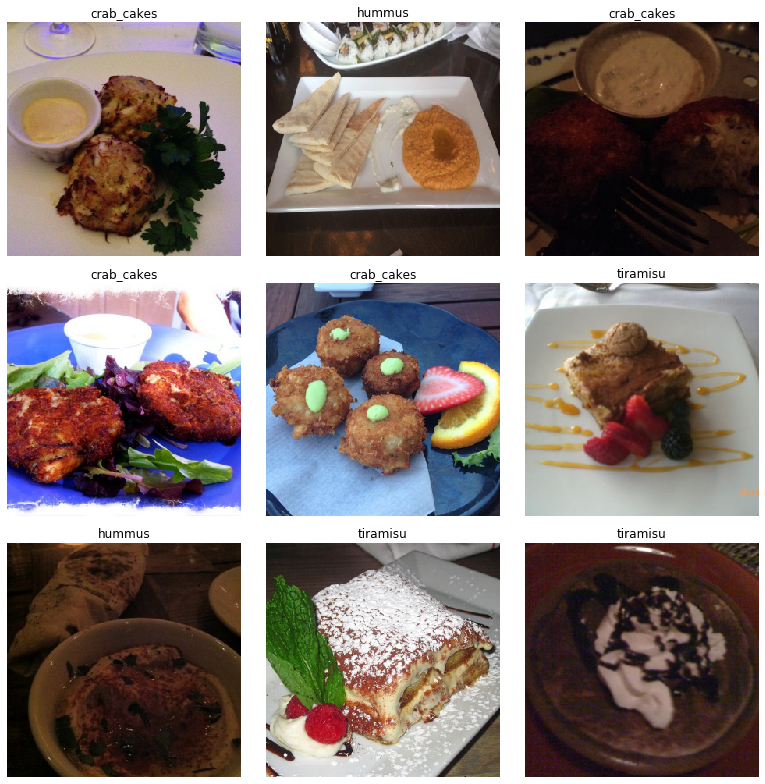

In [24]:
data.show_batch(rows=3, figsize=(11,11))

In [25]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 110MB/s]


In [26]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [27]:
learn.fit_one_cycle(4)

In [0]:
learn.save('stage-1')

With 4 random classes and pic size of 300 accuracy is 93.4%.


With all 101 labels and just with 4 epochs accuracy was mere 40%.
Nextt plans: 
1. Change size of images of bigger dimensions and see. 
2. Start with selecting randomly 4 classes only.
3. gradually increase the number of classification and see the trend.
4. Increase epoch when testing with all 101 classes.

In [29]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

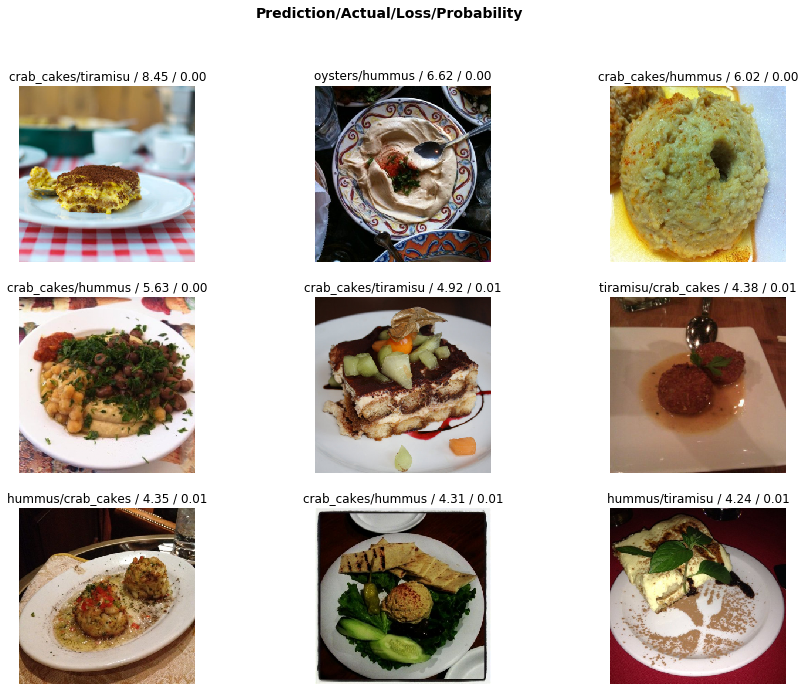

In [30]:
interp.plot_top_losses(9, figsize=(15,11))